In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [154]:
txt_file = open('text.txt', "r")
data_text = txt_file.read()
text = [c.lower() for c in data_text]
N = len(text)

In [134]:
text[:10]

['a', 'c', 't', ' ', 'i', '\n', 's', 'c', 'e', 'n']

In [227]:
chars, occurrencies = np.unique(text, return_counts=True)
probs = occurrencies/N

n = len(chars)
print("number of characters = ", n, "\n",chars)
print(occurrencies)

number of characters =  39 
 ['\n' ' ' '!' '&' "'" ',' '-' '.' ':' ';' '?' '[' ']' 'a' 'b' 'c' 'd' 'e'
 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w'
 'x' 'y' 'z']
[ 4442 23829   242     3   589  1588   279   765   269   333   176    20
    19  5824  1276  1480  2798  8624  1420  1238  4579  5101    58   672
  3182  2106  5041  6191  1395    52  4698  5040  6445  2172   635  1750
    76  1628    93]


In [119]:
def entropy(p):
    N = len(p)
    H   = -np.sum(p * np.log2(p))
    err = np.sqrt( np.sum( ((np.log2(np.e*p))**2 * p * (1 - p))/N))

    return H, err

In [108]:
H, err = entropy(probs, N)
print(H,err)

4.229585766843208 0.009520398469452756


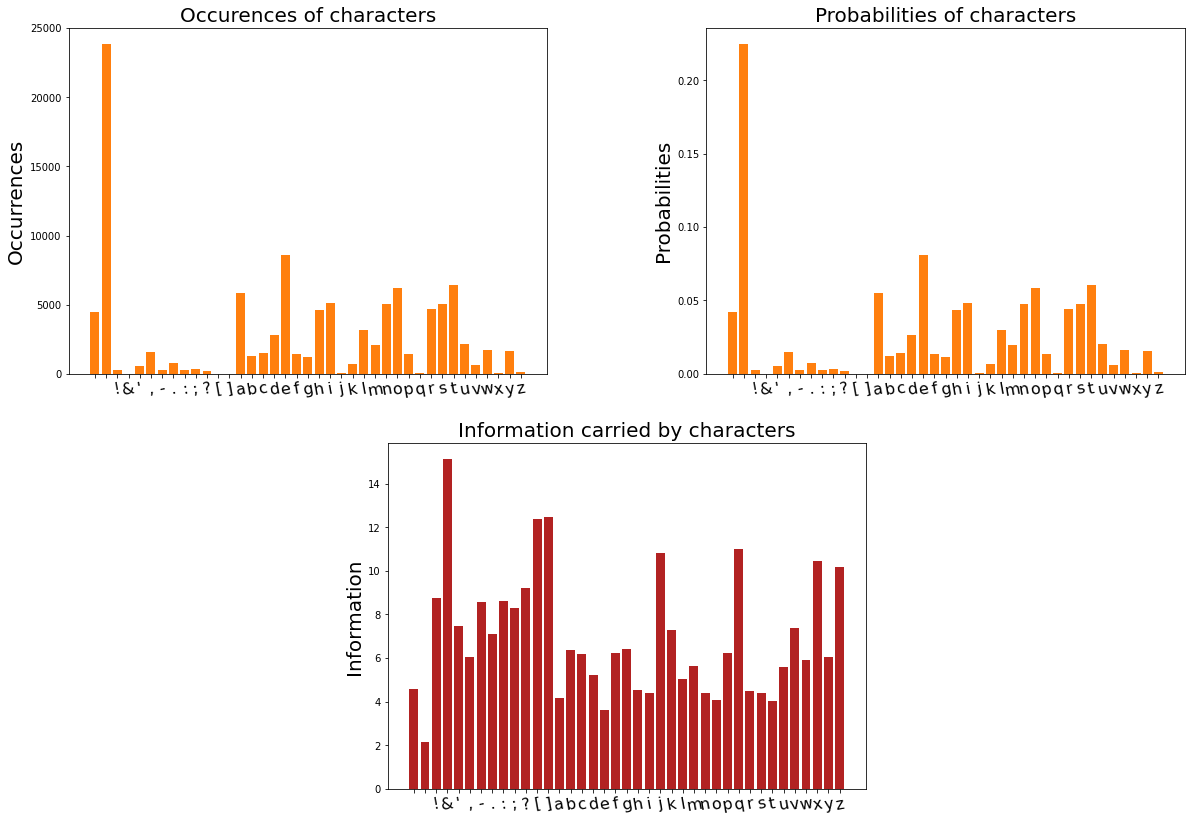

In [225]:
import matplotlib.gridspec as grid

gs = grid.GridSpec(2,4)
gs.update(wspace = 1)

ax1 = plt.subplot(gs[0,:2],)
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,1:3])

ax1.bar(chars,occurrencies, color='C1')
ax1.set_title("Occurences of characters", fontsize=20)
ax1.set_ylabel("Occurrences" , fontsize=20)
ax1.tick_params(axis='x', which='major', labelsize=16, rotation=10 )


ax2.bar(chars,probs, color='C1')
ax2.set_title("Probabilities of characters", fontsize=20)
ax2.set_ylabel("Probabilities" , fontsize=20)
ax2.tick_params(axis='x', which='major', labelsize=16, rotation=10 )


ax3.bar(chars, -np.log2(probs), color='firebrick') 
ax3.set_title("Information carried by characters", fontsize=20)
ax3.set_ylabel("Information" , fontsize=20)

ax3.tick_params(axis='x', which='major', labelsize=16, rotation=10 )

plt.rcParams["figure.figsize"]=(20,14)


The draws are not independent ==> Mutual information:
\begin{equation}
I(X_n, X_{n+1}) = H(X_n) + H(X_{n+1}) - H(X_n,X_{n+1})
\end{equation}


In [163]:
def entropy(p):
    idx = np.where(p>0)
    H = -np.sum(p[idx] * np.log2(p[idx]))
    return H

def mutual_information(pxy):

    px  = np.sum(pxy, axis=0)
    py  = np.sum(pxy, axis=1)
    hx  = entropy(px)
    hy  = entropy(py)
    hxy = entropy(pxy.reshape(-1))
    mi = hx + hy - hxy

    return mi, hx, hy

In [173]:
L = 50 #number of iterations

auto_mi = np.zeros(L)
characters = np.unique(text)
n = len(characters)


for l in range(1,L+1):
    text1 = text[:-l] 
    text2 = text[l:] # sfasiamo due text
    #in this way we constuct all the possible pairs X_n and X_{n+1}
    text3 = [text1[i] + text2[i] for i in range(N-l)]

    char_pairs, occ_pairs = np.unique(text3, return_counts=True)
    #now we construct by hand all the possible pairs
    occ = np.zeros((n,n))

    for i in range(n):
        ci = chars[i]
        for j in range(n):
            cj = chars[j]
            c  = ci + cj
            idx = np.where(char_pairs == c)[0]

            if (len(idx)>0): 
                occ[i,j] = np.squeeze(occ_pairs[idx])
    occ = occ/(N-l)
    auto_mi[l-1], hx, hy = mutual_information(occ)



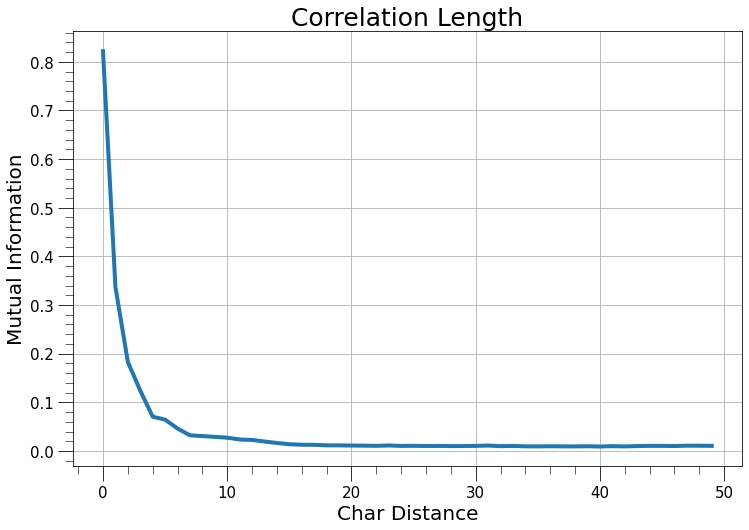

In [176]:
import matplotlib

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(auto_mi, linewidth = 4)

ax.set_title("Correlation Length", fontsize=25)
ax.set_xlabel("Char Distance", fontsize = 20)
ax.set_ylabel("Mutual Information", fontsize = 20)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

Sub Exercizes

In [226]:
prova = np.array(range(1,11))
prova = prova.reshape(2,5) # righe x colonne
print(prova,"\n")
print(np.sum(prova),"\n")
print(np.sum(prova,axis=0),"\n")
print(np.sum(prova,axis=1),"\n")

print(np.squeeze(prova),"\n")
prova = prova.reshape(-1)
print(prova)
print(np.where(prova == 2)[0])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]] 

55 

[ 7  9 11 13 15] 

[15 40] 

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]] 

[ 1  2  3  4  5  6  7  8  9 10]
[1]


Try with a dictionary

In [228]:
data_dict = {
    "char" : chars,
    "occ"  : occurrencies,
    "prob" : occurrencies/N
}

In [238]:
print(data_dict.keys())
data_dict["char"]

dict_keys(['char', 'occ', 'prob'])


array(['\n', ' ', '!', '&', "'", ',', '-', '.', ':', ';', '?', '[', ']',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='<U1')

Dictionary with each letter as key

In [265]:
text = [c.lower() for c in data_text]

char_list = list(set(data_text.lower()))  # get the unique characters in the text

occ_dict = {c: [data_text.lower().count(c), data_text.lower().count(c)/N] for c in char_list} # get the number of occurrences of each character
# prob_dict = {c: data_text.lower().count(c)/N for c in char_list}  # get the probability of each c

In [310]:
print( np.sum( (np.array( [list(occ_dict.values())[i][1] for i in range(n)] ) ) ))
list(occ_dict.values())[:][0]

0.9999999999999999


[635, 0.0059833408714005725]

In [260]:
x = set(("Apple"))
x

{'A', 'e', 'l', 'p'}